# LOCK_EXCHANGE

*HOW TO run plot plot_LOCK.py*

The lock exchange experiment can be use to see the impact of different tracer advection schemes into spurious mixing. Some namelists parametres can be changed to do it. 

![title](start-lock-exchange.001.jpeg)

The first test is to use a FCT2 advection scheme..... **blablabla**

# How to run lock exchange experiment :

## or better: see how to download & compile nemo here: official doc.... BLA BLA BLA

# install NEMO from scratch

PRE-REQUIRED: XIOS needed for input/output for NEMO code

* **download & compile XIOS code : **
> svn co http://forge.ipsl.jussieu.fr/ioserver/svn/XIOS/trunk xios-2.0
<br> cd xios-2.0
<br> ./make_xios --help  (to choice your compiler)
<br> ./make_xios --arch CC_MACOSX --jobs 8

* **download revision 8097 of NEMO : **
> 
mkdir MY_TEST 
<br> cd MY_TEST 
<br> svn --username 'mylogin' co http://forge.ipsl.jussieu.fr/nemo/svn/trunk/NEMOGCM NEMOGCM -r 8097


## Some informations of LOCK_EXCHANGE test case experiments

In EXP00 directory there is available some namelists :
These namelists have same blocks of namelist_ref with choice of:
- tracer advection scheme = **FCT2** or **FCT4**
 - FCT2 = COMPACT 2nd order on horizontal and vertical
 - FCT4 = COMPACT 4th order on horizontal and vertical
- form of the momentum advectionvector = **flux** or **form**
- momentum advection scheme = **cen2** or **ubs**
 - cen2 = 2nd order centered scheme
 - ubs = 3rd order UBS scheme
- ln_dynvor_ene = .false. !  enstrophy conserving scheme
- ln_dynvor_ens = .true.  !  energy conserving scheme
- ln_dynvor_mix = .false. !  mixed scheme
- ln_dynvor_een = .false. !  energy & enstrophy scheme

* **compile LOCK EXCHANGE test case :  **
> 
cd NEMOGCM/CONFIG
<br> ./makenemo -a TEST_CASES -n 'MY_LOCK_EXCHANGE' -r LOCK_EXCHANGE -m macport_osx 

##### Choice done for **ALL experiments** is : 
- **laplacian** lateral diffusion on momentum  (see namelist block: "namdyn_ldf")
- **horizontal direction**     (see namelist block: "namdyn_ldf" ln_dynldf_hor=.true.)
- with coefficient **0.01**    (see namelist block: "namdyn_ldf" coefficient rn_ahm_0)

Now you've an executable opa in TEST_CASES/LOCK_EXCHANGE/EXP00 directory

# First experiment :

* **COPY EXP00 directory in EXP01 :**
> cd TEST_CASES/MY_LOCK_EXCHANGE
<br>cp -R EXP00 EXP01

in NEMOGCM/CONFIG/TEST_CASES/MY_LOCK_EXCHANGE/EXP01 directory there are some namelists available: 

choice the *namelist_FCT4_vect_ens_cfg* one and link it into the namelist_cfg (read by opa):

** ln -sf namelist_FCT4_vect_ens_cfg namelist_cfg **

## EXP1 :  choice of  namelist_FCT4_vect_ens_cfg :
- **FCT4** Advection scheme: FCT (flux-corrected transport scheme) 4th order on horizontal and vertical
- **vect** Vector formulation of the momentum advection
- **ens** Vorticity energy conserving scheme

* Run the EXP1 :
> mpirun -np 1 ./opa

In [10]:
#!/bin/sh 
mpirun -np 1 /Users/sflod/DEVELOP_NEMO/TEST_CASE/paper_overflow/NEMOGCM/CONFIG/TEST_CASES/LOCK_EXCHANGE_paper/EXP01/opa

SyntaxError: invalid syntax (<ipython-input-10-d4a015c303b3>, line 2)

* You'll have the output file **"LOCK_FCT4_vect_ens_grid_T.nc"**
> output file name is set in EXP01/file_def_nemo-opa.xml
<br> in variable name="@expname@"

# output file is created. <br> Run python script to have figure

To have figure you need 3 outputs:
- output filename
- mesh_mask file (output via namelist parameter nn_msh=1 in "namdom" block)
- time step value

In [19]:
input1='LOCK_FCT4_vect_ens_grid_T.nc'

In [20]:
input2='mesh_mask.nc'
input3=33

## Do figure with python script:  "plot_LOCK.py" :

In [21]:
%pylab inline
from netCDF4 import Dataset
import numpy as np
import sys 
import matplotlib.pyplot as plt 

Populating the interactive namespace from numpy and matplotlib


In [22]:
# script to plot theato_inst, for LOCK_EXCHANGE idealized test case
# read input file

In [23]:
def  plot_LOCK(filename , meshmask , time):

    time=int(time)
    ncfile = Dataset(filename, mode='r')

    # read mesh_mask
    ncmesh = Dataset(meshmask) # mesh mask for LOCK_EXCHANGE
    lat2d  = ncmesh.variables['gphit'][  :,:].squeeze()
    lon2d  = ncmesh.variables['glamt'][  :,:].squeeze()
    msk    = ncmesh.variables['tmask'][0,:,:].squeeze()
    ncmesh.close()

    ####
    thetao_nav=ncfile.variables['nav_lon'][1,:] #thetao_nav.shape Out[16]: (130,)

    thetao_inst=ncfile.variables['thetao_inst'][time,:,1,:]
    thetao_e3t_inst=ncfile.variables['e3t_inst'][time,:,1,:]
    thetao_depth=thetao_e3t_inst.squeeze()  #(levato le dim di 1)
    thetao_depth=np.cumsum(thetao_depth,0)  #(levato le dim di 1)
    # np.size(thetao_depth,0) da la prima dimensione (verticale)
    # thetao_nav=np.tile(thetao_nav,(21,1))
    thetao_nav=np.tile(thetao_nav,(np.size(thetao_depth,0),1))

    fig=plt.figure()
    ax=plt.gca()  #get current axis
    plt.pcolor(thetao_nav,thetao_depth,thetao_inst,vmin=0,vmax=30,cmap='jet')
    plt.ylim(np.min(thetao_depth),np.max(thetao_depth))  # per bella figura, come mehmet, fisso max depth tra 1 e 21, se no ho bianco
    plt.xlim(np.min(thetao_nav),np.max(thetao_nav))  # ''  ''     ''      ''   ''     ''    ''  latitudine tra 0 e 64 Km
    #pcol = plt.contourf(thetao_nav,thetao_depth,thetao_inst,levels=vlevel)  # fa i colori interpolati, non mi piace
    #    plt.gca().invert_yaxis() # inverte l'asse y, in questo caso depth
    ax.invert_yaxis() # inverte l'asse y, in questo caso depth
    #pcol = plt.contourf(lon2d,lat2d,thetao_depth,levels=vlevel,extend='both')
    # extended both da le due frecce in alto e in basso ella paletta
    #plt.grid() #mette una griglia puntigliata
    # ax.set_aspect(0.5)  # ok per lock, ma non buono per overflow
    ax.set_aspect(1)
    # aspect ratio x la dimensione della figura

    cb=plt.colorbar(orientation='horizontal')   # aggiunge la colorbar sulla figura
    cb.set_label('temperature (C)')

    plt.ylabel('depth (m)',fontsize=14)
    plt.xlabel('x (km)',fontsize=14)
    #   plt.title(filename[:-5]+' at '+str(time)+' time step')
    plt.title(filename[:-10]+' at '+str(time)+' time step')

    figname=filename[:-10]+'_fig_depth_temp_at_'+str(time)+'.png'
    plt.savefig(figname, dpi=300)
    # dpi definizione della figura
    # aspect ratio x la dimensione della figura

    ncfile.close()
    return

In [24]:
plot_LOCK-fz.py LOCK_FCT4_vect_ens_grid_T.nc mesh_mask.nc  33

SyntaxError: invalid syntax (<ipython-input-24-7dd923df3a2b>, line 1)

In [25]:
%cd /Users/sflod/CORSO_NEMO/TUTORIAL/LOCK_ECHANGE

/Users/sflod/CORSO_NEMO/TUTORIAL/LOCK_ECHANGE


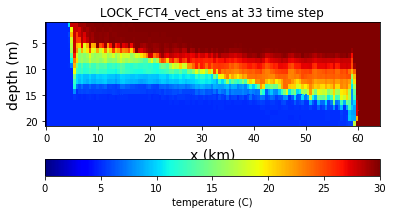

In [26]:
plot_LOCK( input1, input2, input3 )

In [10]:
import os, glob
curdir=os.getcwd()
print os.listdir(curdir)
print glob.glob('*/*.nc')

['.ipynb_checkpoints', 'lock-notebook.ipynb', 'LOCK_FCT2_flux_cen2_grid_T.nc', 'LOCK_FCT4_vect_ens_fig_depth_temp_at_33.png', 'LOCK_FCT4_vect_ens_grid_T.nc', 'mesh_mask.nc', 'namelist_cfg', 'namelist_FCT2_flux_cen2_cfg', 'namelist_FCT2_flux_ubs_cfg', 'namelist_FCT2_vect_een_cfg', 'namelist_FCT2_vect_eenH_cfg', 'namelist_FCT2_vect_ene_cfg', 'namelist_FCT2_vect_ens_cfg', 'namelist_FCT4_flux_cen2_cfg', 'namelist_FCT4_flux_ubs_cfg', 'namelist_FCT4_vect_een_cfg', 'namelist_FCT4_vect_eenH_cfg', 'namelist_FCT4_vect_ene_cfg', 'namelist_FCT4_vect_ens_cfg', 'opa', 'plot_LOCK-fz.py', 'plot_OVF.py', 'start-lock-exchange.001.jpeg']
[]


In [49]:
function('netcdf_files/OK_zps_FCT4_fluxcen2_blpbhm001_coef32smago/OVF_zps_FCT4_fluxcen2_blpbhm001_coef32_grid_T.nc', 'netcdf_files/mesh_mask_OVF_zps.nc', 18)

In [25]:
%%bash 
echo $PATH

ERROR:root:Line magic function `%bash` not found (But cell magic `%%bash` exists, did you mean that instead?).
